In [1]:
from covid19dh import covid19
import covsirphy as cs
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

Obtain the list of provinces (i.e. Regioni) as formatted as in the input data. 

Documentation is here https://lisphilar.github.io/covid19-sir/index.html

In [3]:
data_loader     = cs.DataLoader("input")
# (Main) Data
jhu_data        = data_loader.jhu(verbose = False)
jhu_data.records(country = "Italy")
# (Main) Population in each country
population_data = data_loader.population()


data            = pd.read_csv("input/covid19dh.csv", low_memory = False)
data_italy      = data[data.ISO3 == 'ITA'] 
provinces_list  = data_italy.loc[:,"Province/State"].dropna().unique().tolist()
provinces_list

Retrieving COVID-19 dataset in Japan from https://github.com/lisphilar/covid19-sir/data/japan


['Friuli Venezia Giulia',
 'P.A. Bolzano',
 'Molise',
 'Campania',
 'Veneto',
 'Basilicata',
 'Lazio',
 'Lombardia',
 'P.A. Trento',
 'Piemonte',
 "Valle d'Aosta",
 'Sicilia',
 'Marche',
 'Calabria',
 'Liguria',
 'Umbria',
 'Emilia-Romagna',
 'Abruzzo',
 'Puglia',
 'Toscana',
 'Sardegna']

# National Scenario Analysis

In [ ]:
# If you want to stop displaying figures when using interactive shell,
# snl.interactive = False

# If we want to set another score for the fit:
# snl.score(metrics="RMSLE") (str) – “MAE”, “MSE”, “MSLE”, “RMSE” or “RMSLE”

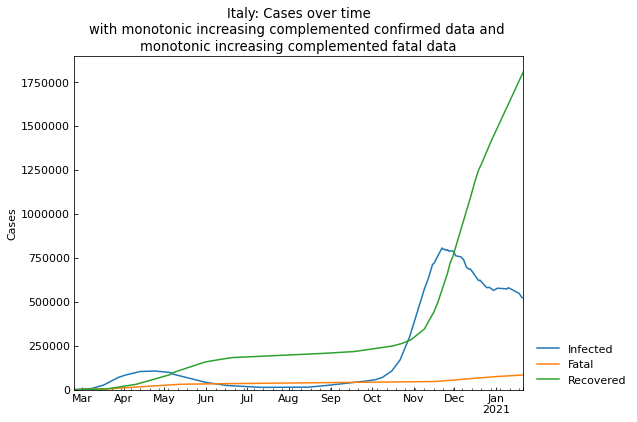

,Date,Infected,Fatal,Recovered
0,2020-02-24,221,7,1
1,2020-02-25,311,10,1
2,2020-02-26,385,12,3
3,2020-02-27,587,17,45
4,2020-02-28,820,21,46
...,...,...,...,...
328,2021-01-17,553374,82177,1745726
329,2021-01-18,547059,82554,1760489
330,2021-01-19,535524,83157,1781917
331,2021-01-20,523553,83681,1806932


In [4]:
National_scenario = cs.Scenario(jhu_data, population_data, country="Italy", province= None, tau=1440)
record_df = National_scenario.records()
record_df

**Daily new cases**

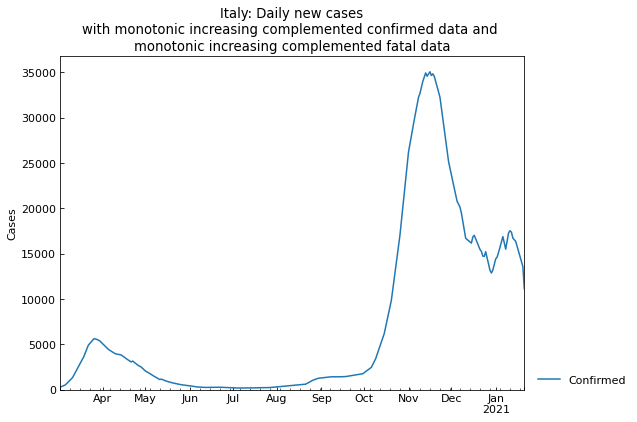

,Confirmed
Date,
2020-03-02,257
2020-03-03,310
2020-03-04,383
2020-03-05,457
2020-03-06,534
...,...
2021-01-17,14969
2021-01-18,14440
2021-01-19,13905


In [12]:
#running average has window of 7 days to avoid oscillations
National_scenario.records_diff(variables=["Confirmed"], window = 7 )

**Using number of infected individuals**

We want now to tune the bounds for every phase

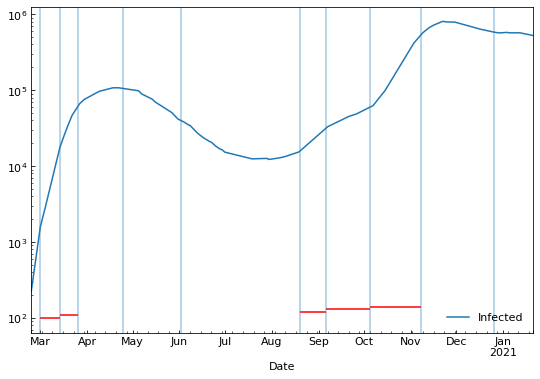

In [106]:
national_dates = ["01Mar2020" , "14Mar2020" , "26Mar2020", "25Apr2020" , "02Jun2020" , 
                  "20Aug2020" , "06Sep2020" ,"05Oct2020" , "08Nov2020" , "26Dec2020" ]

record_df.plot("Date", "Infected")
for i in national_dates:
    plt.axvline(i, alpha = 0.4)

#we want to extract the infectivity (beta) in the intervals denoted with red color 
plt.hlines(1e2  , '01Mar2020',"14Mar2020", 'red')
plt.hlines(1.1e2, '14Mar2020',"26Mar2020", 'red')
plt.hlines(1.2e2, '20Aug2020',"06Sep2020", 'red')
plt.hlines(1.3e2, '06Sep2020',"05Oct2020", 'red')
plt.hlines(1.4e2, '05Oct2020',"08Nov2020", 'red')

plt.yscale('log')
plt.show()

In [112]:
# Clear all phases
National_scenario.clear(include_past=True).summary()
National_scenario.summary()

""


In [113]:
for phase_end in national_dates:
    National_scenario.add(end_date=phase_end)
National_scenario.add().summary()

,Type,Start,End,Population,tau
0th,Past,24Feb2020,01Mar2020,60421760,1440
1st,Past,02Mar2020,14Mar2020,60421760,1440
2nd,Past,15Mar2020,26Mar2020,60421760,1440
3rd,Past,27Mar2020,25Apr2020,60421760,1440
4th,Past,26Apr2020,02Jun2020,60421760,1440
5th,Past,03Jun2020,20Aug2020,60421760,1440
6th,Past,21Aug2020,06Sep2020,60421760,1440
7th,Past,07Sep2020,05Oct2020,60421760,1440
8th,Past,06Oct2020,08Nov2020,60421760,1440
9th,Past,09Nov2020,26Dec2020,60421760,1440


**Fit the SIR model**

In [114]:
# National_scenario.disable(phases=["0th"])
# National_scenario.disable(phases=["2nd"])
# National_scenario.disable(phases=["3rd"])
# National_scenario.disable(phases=["4th"])
# National_scenario.disable(phases=["7th"])
# National_scenario.disable(phases=["8rd"])
# National_scenario.summary()

In [115]:
National_scenario.estimate(cs.SIR)
National_scenario.score(metrics='RMSE')
National_scenario.summary()


<SIR model: parameter estimation>
Running optimization with 4 CPUs...
	 6th phase (06Oct2020 - 08Nov2020): finished  136 trials in 0 min 10 sec
	 8th phase (09Nov2020 - 26Dec2020): finished 1792 trials in 3 min  1 sec
	 1st phase (21Aug2020 - 06Sep2020): finished 1817 trials in 3 min  1 sec
	 3rd phase (26Apr2020 - 02Jun2020): finished 1768 trials in 3 min  1 sec
	 4th phase (27Dec2020 - 21Jan2021): finished  136 trials in 0 min 10 sec
	 9th phase (15Mar2020 - 26Mar2020): finished 1763 trials in 3 min  1 sec
	10th phase (03Jun2020 - 20Aug2020): finished  245 trials in 0 min 20 sec
	 5th phase (07Sep2020 - 05Oct2020): finished  128 trials in 0 min 10 sec
	 0th phase (24Feb2020 - 01Mar2020): finished 2151 trials in 3 min  1 sec
	 2nd phase (02Mar2020 - 14Mar2020): finished 1941 trials in 3 min  1 sec
	 7th phase (27Mar2020 - 25Apr2020): finished 2269 trials in 3 min  1 sec
Completed optimization. Total: 6 min 14 sec


,Type,Start,End,Population,ODE,Rt,rho,sigma,tau,1/gamma [day],1/beta [day],RMSLE,Trials,Runtime
0th,Past,24Feb2020,01Mar2020,60421760,SIR,18.48,0.328992,0.017801,1440,56,3,0.246558,2151,3 min 1 sec
1st,Past,02Mar2020,14Mar2020,60421760,SIR,5.79,0.223126,0.038540,1440,25,4,0.066558,1941,3 min 1 sec
2nd,Past,15Mar2020,26Mar2020,60421760,SIR,4.17,0.143690,0.034431,1440,29,6,0.036613,1763,3 min 1 sec
3rd,Past,27Mar2020,25Apr2020,60421760,SIR,1.83,0.047249,0.025871,1440,38,21,0.050713,2269,3 min 1 sec
4th,Past,26Apr2020,02Jun2020,60421760,SIR,0.36,0.013240,0.036291,1440,27,75,0.045842,1768,3 min 1 sec
5th,Past,03Jun2020,20Aug2020,60421760,SIR,0.40,0.012811,0.032172,1440,31,78,0.162507,245,0 min 20 sec
6th,Past,21Aug2020,06Sep2020,60421760,SIR,4.15,0.056766,0.013686,1440,73,17,0.009383,1817,3 min 1 sec
7th,Past,07Sep2020,05Oct2020,60421760,SIR,2.16,0.038647,0.017910,1440,55,25,0.010963,128,0 min 10 sec
8th,Past,06Oct2020,08Nov2020,60421760,SIR,5.81,0.082849,0.014252,1440,70,12,0.035162,136,0 min 10 sec
9th,Past,09Nov2020,26Dec2020,60421760,SIR,1.18,0.036182,0.030562,1440,32,27,0.108178,1792,3 min 1 sec


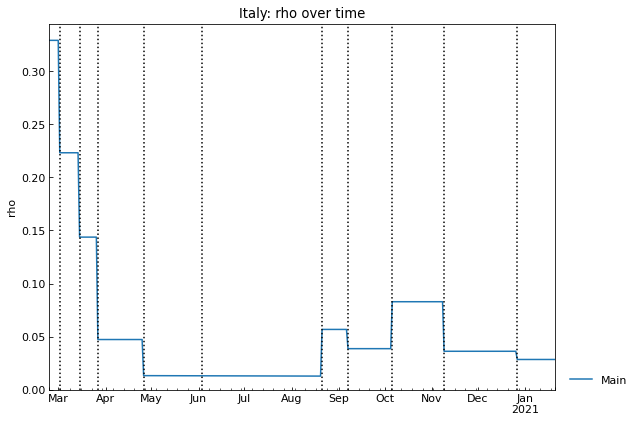

In [116]:
# Scenario.history() method shows the trajectories of parameters (and the number of cases).
National_rho = National_scenario.history(show_figure=True, target="rho")

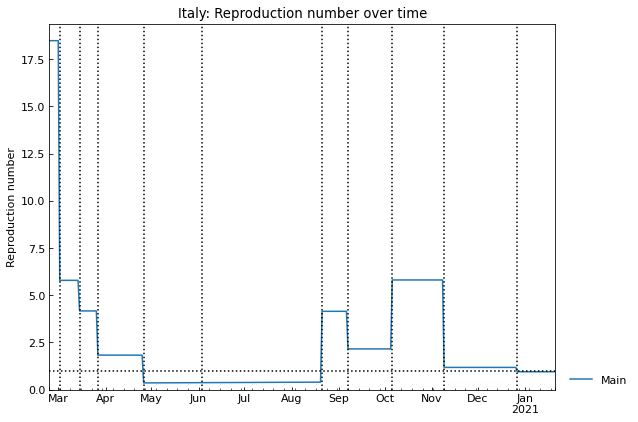

In [117]:
National_Rt = National_scenario.history(show_figure=True, target="Rt")

See whether fit parameters fit good the data

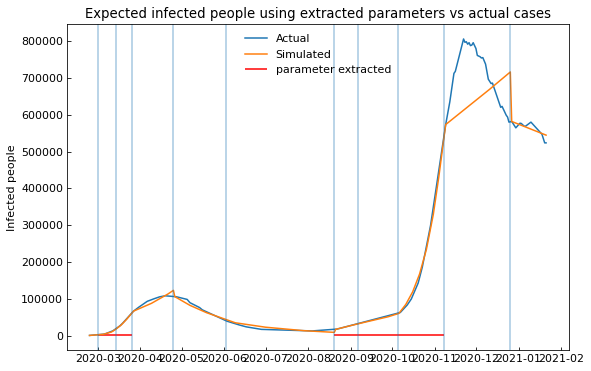

In [118]:
temp_df = National_scenario.history("Infected",show_figure=False).reset_index()

#we want to extract the infectivity (beta) in the intervals denoted with red color
plt.plot(temp_df.Date, temp_df.Actual, label = "Actual")
plt.plot(temp_df.Date, temp_df.Main, label = "Simulated")

# plt.plot(temp_df.Date, temp_df.Actual - temp_df.Main, label = "Diff")

for i in national_dates:
    plt.axvline(datetime.datetime.strptime(i, '%d%b%Y'), alpha = 0.4)

plt.hlines(1.0e2, datetime.datetime.strptime("01Mar2020", '%d%b%Y'),
                  datetime.datetime.strptime("14Mar2020", '%d%b%Y'), 'red')
    
plt.hlines(1.1e2, datetime.datetime.strptime("14Mar2020", '%d%b%Y'),
                  datetime.datetime.strptime("26Mar2020", '%d%b%Y'), 'red')

plt.hlines(1.2e2, datetime.datetime.strptime("20Aug2020", '%d%b%Y'),
                  datetime.datetime.strptime("06Sep2020", '%d%b%Y'), 'red')

plt.hlines(1.3e2, datetime.datetime.strptime("06Sep2020", '%d%b%Y'),
                  datetime.datetime.strptime("05Oct2020", '%d%b%Y'), 'red')

plt.hlines(1.4e2, datetime.datetime.strptime("05Oct2020", '%d%b%Y'),
                  datetime.datetime.strptime("08Nov2020", '%d%b%Y'), 'red', label = 'parameter extracted')
# plt.yscale('log')
plt.title('Expected infected people using extracted parameters vs actual cases')
plt.ylabel("Infected people")
plt.legend()
plt.show()

**Estimated accuracies for the different phases**

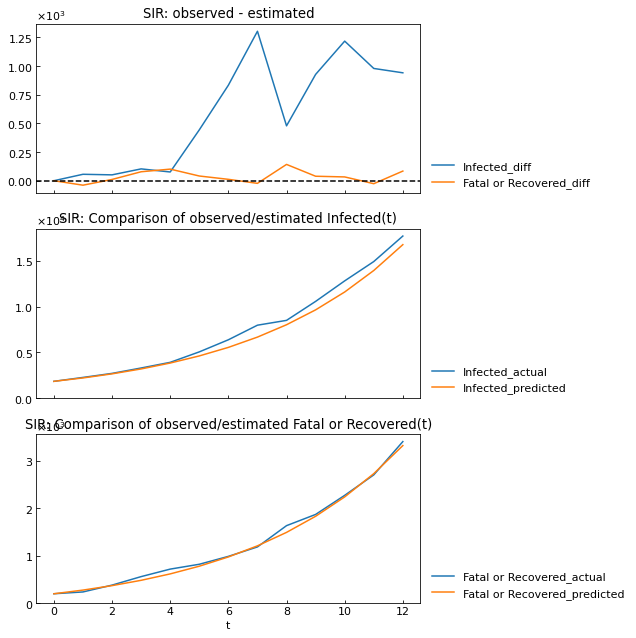

In [119]:
National_scenario.estimate_accuracy(phase="1st")

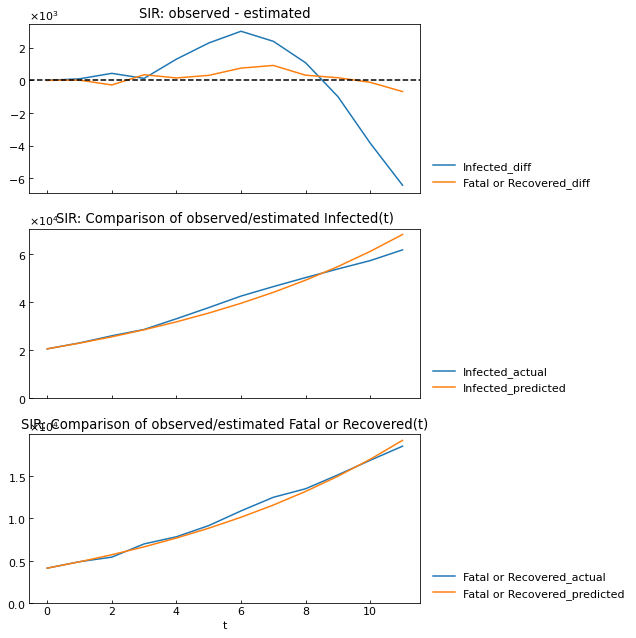

In [120]:
National_scenario.estimate_accuracy(phase="2nd")

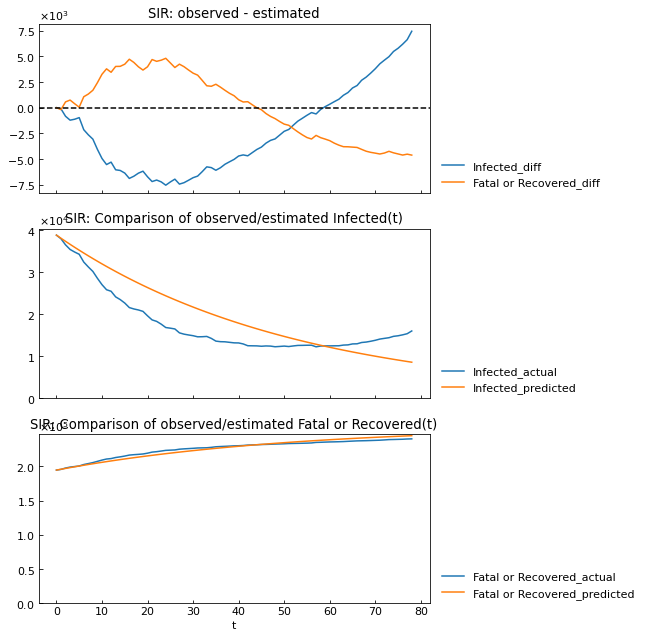

In [121]:
National_scenario.estimate_accuracy(phase="5th")

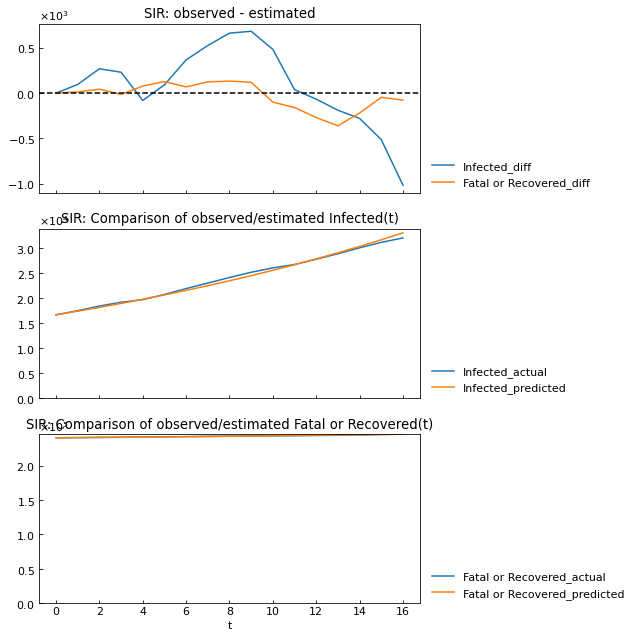

In [122]:
National_scenario.estimate_accuracy(phase="6th")

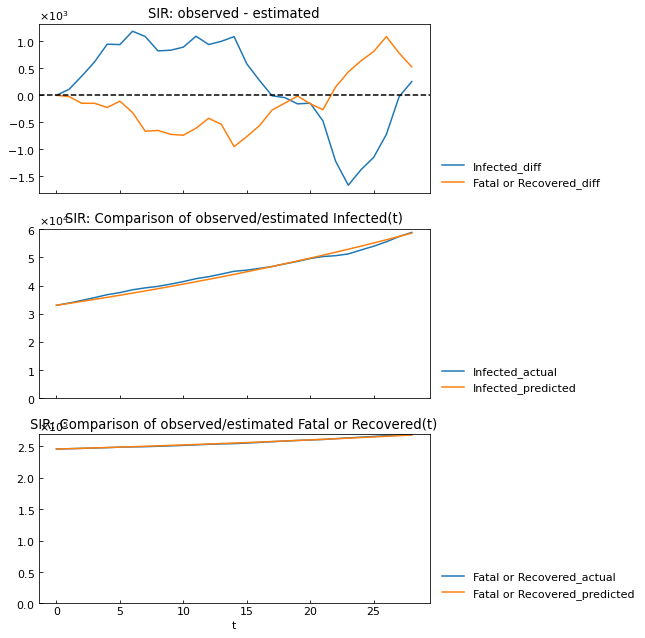

In [123]:
National_scenario.estimate_accuracy(phase="7th")

### Set manually the phases but using DPCM restrictions

In [124]:
# Clear all phases
National_scenario.clear(include_past=True).summary()
National_scenario.summary()

""


In [125]:
# Set 0th phase to set the start date of 1st phase
National_scenario.add(end_date="27Feb2020")
# Add 1st phase and disable 0th phase
National_scenario.add(end_date="10Mar2020")
# Add 2nd phase
National_scenario.add(end_date="18May2020")
# Add 3rd phase
National_scenario.add(end_date="03Nov2020")
# Add 4th phase
National_scenario.add(end_date="22Dec2020")
# Add 5th phase
National_scenario.add(end_date="10Jan2021")
# Add 6th phase to the last of the records
National_scenario.add().summary()

,Type,Start,End,Population,tau
0th,Past,24Feb2020,27Feb2020,60421760,1440
1st,Past,28Feb2020,10Mar2020,60421760,1440
2nd,Past,11Mar2020,18May2020,60421760,1440
3rd,Past,19May2020,03Nov2020,60421760,1440
4th,Past,04Nov2020,22Dec2020,60421760,1440
5th,Past,23Dec2020,10Jan2021,60421760,1440
6th,Past,11Jan2021,21Jan2021,60421760,1440


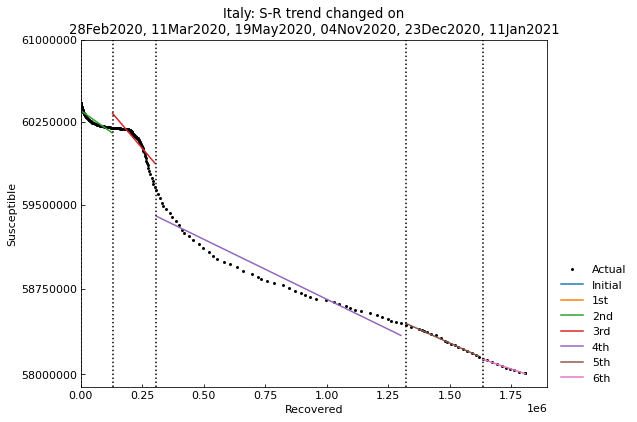

In [126]:
National_scenario.trend(force = False)

In [127]:
National_scenario.estimate(cs.SIR)
National_scenario.summary()


<SIR model: parameter estimation>
Running optimization with 4 CPUs...
	 0th phase (23Dec2020 - 10Jan2021): finished  115 trials in 0 min 10 sec
	 3rd phase (28Feb2020 - 10Mar2020): finished 1631 trials in 3 min  1 sec
	 1st phase (11Mar2020 - 18May2020): finished 1592 trials in 3 min  1 sec
	 6th phase (04Nov2020 - 22Dec2020): finished 1621 trials in 3 min  1 sec
	 2nd phase (11Jan2021 - 21Jan2021): finished  197 trials in 0 min 10 sec
	 4th phase (24Feb2020 - 27Feb2020): finished 1660 trials in 3 min  1 sec
	 5th phase (19May2020 - 03Nov2020): finished 3099 trials in 3 min  0 sec
Completed optimization. Total: 6 min  3 sec


,Type,Start,End,Population,ODE,Rt,rho,sigma,tau,1/gamma [day],1/beta [day],RMSLE,Trials,Runtime
0th,Past,24Feb2020,27Feb2020,60421760,SIR,13.45,0.337085,0.025054,1440,39,2,0.205034,1660,3 min 1 sec
1st,Past,28Feb2020,10Mar2020,60421760,SIR,5.97,0.233515,0.039144,1440,25,4,0.168412,1631,3 min 1 sec
2nd,Past,11Mar2020,18May2020,60421760,SIR,2.29,0.054497,0.023797,1440,42,18,0.836841,1592,3 min 1 sec
3rd,Past,19May2020,03Nov2020,60421760,SIR,0.81,0.014525,0.017919,1440,55,68,0.618930,3099,3 min 0 sec
4th,Past,04Nov2020,22Dec2020,60421760,SIR,1.49,0.044786,0.030052,1440,33,22,0.140573,1621,3 min 1 sec
5th,Past,23Dec2020,10Jan2021,60421760,SIR,0.91,0.026980,0.029622,1440,33,37,0.010481,115,0 min 10 sec
6th,Past,11Jan2021,21Jan2021,60421760,SIR,0.77,0.026158,0.033998,1440,29,38,0.004940,197,0 min 10 sec


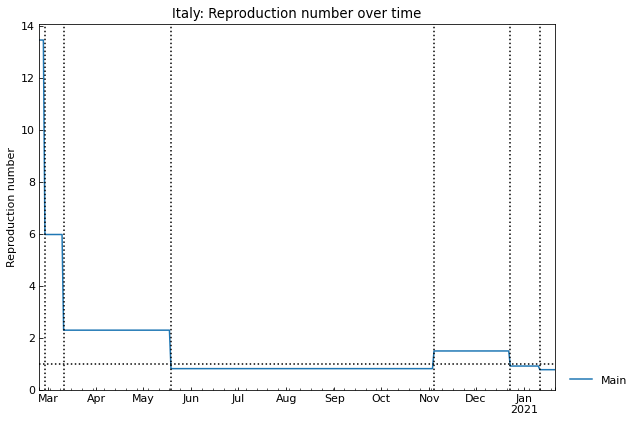

In [128]:
# Scenario.history() method shows the trajectories of parameters (and the number of cases).
National_Rt = National_scenario.history(target="Rt")

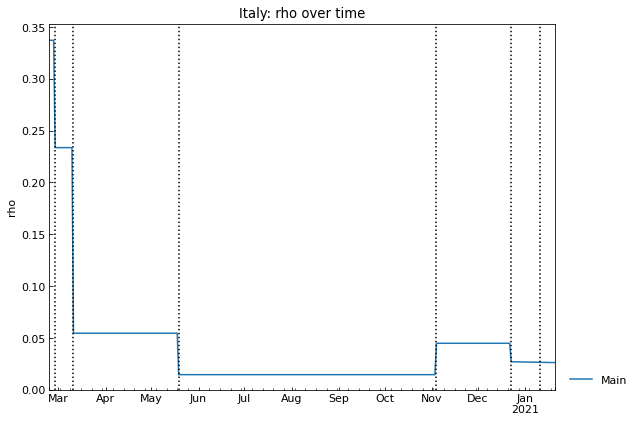

In [129]:
# Scenario.history() method shows the trajectories of parameters (and the number of cases).
National_rho = National_scenario.history(target="rho")

# Trials

In [86]:
#Add the susceptible column
record_df["Susceptible"] = population_data.value("Italy", province=None) - np.array(record_df.Infected) - np.array(record_df.Fatal) - np.array(record_df.Recovered)
record_df

,Date,Infected,Fatal,Recovered,Susceptible
0,2020-02-24,221,7,1,60421531
1,2020-02-25,311,10,1,60421438
2,2020-02-26,385,12,3,60421360
3,2020-02-27,587,17,45,60421111
4,2020-02-28,820,21,46,60420873
...,...,...,...,...,...
327,2021-01-16,557717,81800,1729216,58053027
328,2021-01-17,553374,82177,1745726,58040483
329,2021-01-18,547059,82554,1760489,58031658
330,2021-01-19,535524,83157,1781917,58021162


We can calculate the number of **daily new cases** with Scenario.record_diff() method.

In [174]:
# Clear all phases
National_scenario.clear(include_past=True).summary()
National_scenario.summary()

for phase_end in national_dates:
    National_scenario.add(end_date=phase_end)
National_scenario.add().summary()

,Type,Start,End,Population,tau
0th,Past,24Feb2020,26Mar2020,60421760,1440
1st,Past,27Mar2020,25Apr2020,60421760,1440
2nd,Past,26Apr2020,02Jun2020,60421760,1440
3rd,Past,03Jun2020,05Aug2020,60421760,1440
4th,Past,06Aug2020,01Sep2020,60421760,1440
5th,Past,02Sep2020,01Oct2020,60421760,1440
6th,Past,02Oct2020,05Nov2020,60421760,1440
7th,Past,06Nov2020,20Dec2020,60421760,1440
8th,Past,21Dec2020,20Jan2021,60421760,1440


In [175]:
National_scenario.estimate(cs.SIRD)
National_scenario.summary()


<SIR-D model: parameter estimation>
Running optimization with 4 CPUs...
	 0th phase (26Apr2020 - 02Jun2020): finished 1559 trials in 3 min  1 sec
	 2nd phase (06Nov2020 - 20Dec2020): finished 1541 trials in 3 min  1 sec
	 3rd phase (27Mar2020 - 25Apr2020): finished 1557 trials in 3 min  1 sec
	 1st phase (02Sep2020 - 01Oct2020): finished 1551 trials in 3 min  1 sec
	 8th phase (21Dec2020 - 20Jan2021): finished   88 trials in 0 min 10 sec
	 5th phase (03Jun2020 - 05Aug2020): finished  168 trials in 0 min 20 sec
	 4th phase (02Oct2020 - 05Nov2020): finished 1680 trials in 3 min  1 sec
	 7th phase (24Feb2020 - 26Mar2020): finished 1708 trials in 3 min  1 sec
	 6th phase (06Aug2020 - 01Sep2020): finished 1813 trials in 3 min  1 sec
Completed optimization. Total: 6 min 14 sec


,Type,Start,End,Population,ODE,Rt,kappa,rho,sigma,tau,1/beta [day],1/alpha2 [day],1/gamma [day],RMSLE,Trials,Runtime
0th,Past,24Feb2020,26Mar2020,60421760,SIR-D,6.12,0.014754,0.218554,0.020964,1440,4,67,47,0.635191,1708,3 min 1 sec
1st,Past,27Mar2020,25Apr2020,60421760,SIR-D,1.93,0.006670,0.047248,0.017831,1440,21,149,56,0.070457,1557,3 min 1 sec
2nd,Past,26Apr2020,02Jun2020,60421760,SIR-D,0.37,0.002601,0.013237,0.033562,1440,75,384,29,0.042485,1559,3 min 1 sec
3rd,Past,03Jun2020,05Aug2020,60421760,SIR-D,0.34,0.001335,0.012105,0.034702,1440,82,749,28,0.091946,168,0 min 20 sec
4th,Past,06Aug2020,01Sep2020,60421760,SIR-D,2.55,0.000402,0.039920,0.015234,1440,25,2484,65,0.038029,1813,3 min 1 sec
5th,Past,02Sep2020,01Oct2020,60421760,SIR-D,2.49,0.000343,0.040668,0.015975,1440,24,2914,62,0.020654,1551,3 min 1 sec
6th,Past,02Oct2020,05Nov2020,60421760,SIR-D,5.30,0.000608,0.075339,0.013597,1440,13,1643,73,0.060135,1680,3 min 1 sec
7th,Past,06Nov2020,20Dec2020,60421760,SIR-D,1.41,0.001007,0.044784,0.030761,1440,22,992,32,0.099054,1541,3 min 1 sec
8th,Past,21Dec2020,20Jan2021,60421760,SIR-D,0.89,0.000802,0.026349,0.028815,1440,37,1246,34,0.011739,88,0 min 10 sec


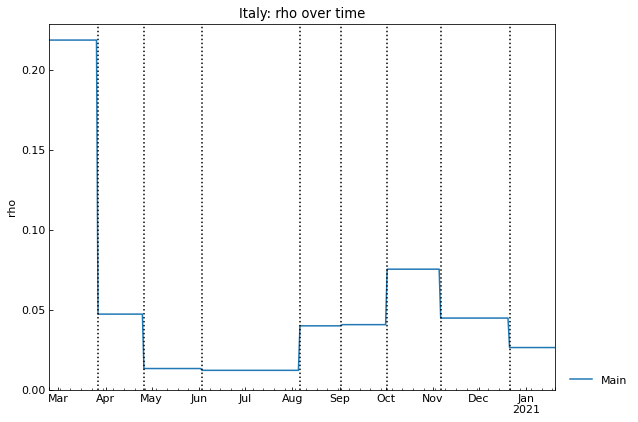

In [176]:
# Scenario.history() method shows the trajectories of parameters (and the number of cases).
National_Rho = National_scenario.history(target="rho")

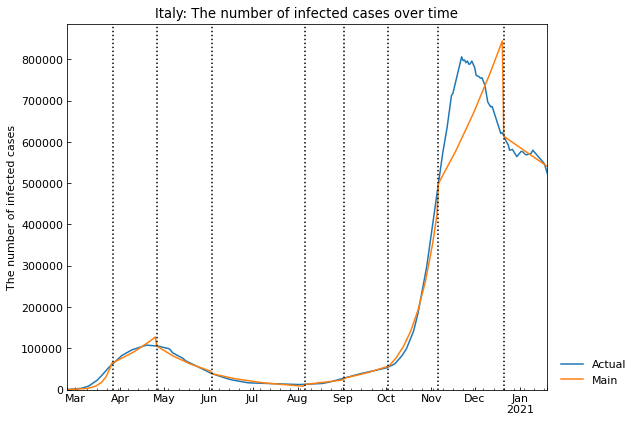

In [177]:
_ = National_scenario.history("Infected")

# Now do the same, but for different regions

It is done by the mean of a dictionary with:
+ key: id of the region
+ value: name of the region

In [34]:
scenarios_list = []
province_dict = {}

for i, province in enumerate(provinces_list):
    province_dict.update({i : province})
    scenarios_list.append(cs.Scenario(jhu_data, population_data, country="Italy",
                                      province = province, tau=1440))
province_dict

{0: 'Friuli Venezia Giulia',
 1: 'P.A. Bolzano',
 2: 'Molise',
 3: 'Campania',
 4: 'Veneto',
 5: 'Basilicata',
 6: 'Lazio',
 7: 'Lombardia',
 8: 'P.A. Trento',
 9: 'Piemonte',
 10: "Valle d'Aosta",
 11: 'Sicilia',
 12: 'Marche',
 13: 'Calabria',
 14: 'Liguria',
 15: 'Umbria',
 16: 'Emilia-Romagna',
 17: 'Abruzzo',
 18: 'Puglia',
 19: 'Toscana',
 20: 'Sardegna'}

In [77]:
min_date_list_str = []
min_date_datetime_list = []

for i, prov in enumerate(provinces_list):
    min_date_list.append(scenarios_list[i].first_date)
    min_date_datetime_list.append(datetime.datetime.strptime(scenarios_list[i].first_date, '%d%b%Y'))
    print(scenarios_list[i].first_date, " :  ", province_dict.get(i))
print("\n")

min_date_datetime = max(min_date_datetime_list)
min_date_str      = min_date_list[min_date_datetime_list.index(min_date_datetime)]

print("Lates data collected is:", min_date_datetime , "---> ", province_dict.get(min_date_datetime_list.index(min_date_datetime)))

06Mar2020  :   Friuli Venezia Giulia
15Mar2020  :   P.A. Bolzano
16Mar2020  :   Molise
08Mar2020  :   Campania
03Mar2020  :   Veneto
26Mar2020  :   Basilicata
24Feb2020  :   Lazio
27Feb2020  :   Lombardia
10Mar2020  :   P.A. Trento
19Mar2020  :   Piemonte
19Mar2020  :   Valle d'Aosta
27Feb2020  :   Sicilia
21Mar2020  :   Marche
09Mar2020  :   Calabria
29Feb2020  :   Liguria
11Mar2020  :   Umbria
03Mar2020  :   Emilia-Romagna
12Mar2020  :   Abruzzo
04Mar2020  :   Puglia
28Feb2020  :   Toscana
16Mar2020  :   Sardegna


Lates data collected is: 2020-03-26 00:00:00 --->  Basilicata


In [35]:
def FIT_SIR_scenario(scenario, phases_manually):
    # Clear all phases
    scenario.clear(include_past=True).summary()
    scenario.summary()
    
    if (len(phases_manually) == 0):
        snl.trend(set_phases=True)
    else:
        #if a list of phases bounds is present then use it
        for phase_end in phases_manually:
            scenario.add(end_date=phase_end)
        #add the last scenario
        scenario.add()
        
    #use the estimate object to fit the SIR parameters
    scenario.estimate(cs.SIR)
    
    return scenario

In [40]:
phases_list = ["27Feb2020", "10Mar2020" , "18May2020" , "03Nov2020" , "22Dec2020" , "10Jan2021"]
phases_list_regions = ["18May2020" , "03Nov2020" , "22Dec2020" , "10Jan2021"]

In [45]:
# for i in range(provinces_list):
import os
os.makedirs('results/', exist_ok = True)

for i in range(2):
    
    print("For province: ", province_dict.get(i))
    
    FIT_SIR_scenario(scenarios_list[i], phases_list_regions)
    scenarios_list[i].summary().to_csv('results/'+str(province_dict.get(i))+'.csv')
    
    print("Done for province: ", province_dict.get(i))
    print("\n\n")

For province:  Friuli Venezia Giulia

<SIR model: parameter estimation>
Running optimization with 4 CPUs...
	 0th phase (11Jan2021 - 20Jan2021): finished  175 trials in 0 min 10 sec
	 3rd phase (06Mar2020 - 10Mar2020): finished 1942 trials in 3 min  1 sec
	 2nd phase (11Mar2020 - 18May2020): finished 1936 trials in 3 min  1 sec
	 1st phase (19May2020 - 03Nov2020): finished 1917 trials in 3 min  1 sec
	 4th phase (04Nov2020 - 22Dec2020): finished 1966 trials in 3 min  1 sec
	 5th phase (23Dec2020 - 10Jan2021): finished 3316 trials in 3 min  0 sec
Completed optimization. Total: 6 min  2 sec
Done for province:  Friuli Venezia Giulia



For province:  P.A. Bolzano


ValueError: @end_date must be over 14Mar2020. However, 10Mar2020 was applied.

In [105]:
temp_df["New_Infections"] = temp_df.Susceptible - temp_df.Infected

,Date,Infected,Fatal,Recovered,Susceptible
0,2020-02-24,2,0,1,5896690
1,2020-02-25,2,0,1,5896690
2,2020-02-26,0,0,3,5896690
3,2020-02-27,0,0,3,5896690
4,2020-02-28,0,0,3,5896690
...,...,...,...,...,...
327,2021-01-16,77376,4378,106646,5708293
328,2021-01-17,77510,4399,107734,5707050
329,2021-01-18,77345,4415,108755,5706178
330,2021-01-19,75236,4474,111905,5705078


7     2020-03-02
8     2020-03-03
9     2020-03-04
10    2020-03-05
11    2020-03-06
         ...    
327   2021-01-16
328   2021-01-17
329   2021-01-18
330   2021-01-19
331   2021-01-20
Name: Date, Length: 325, dtype: datetime64[ns]

In [121]:
prova

,Confirmed
Date,
2020-03-02,0
2020-03-03,1
2020-03-04,3
2020-03-05,5
2020-03-06,7
...,...
2021-01-16,1497
2021-01-17,1426
2021-01-18,1371


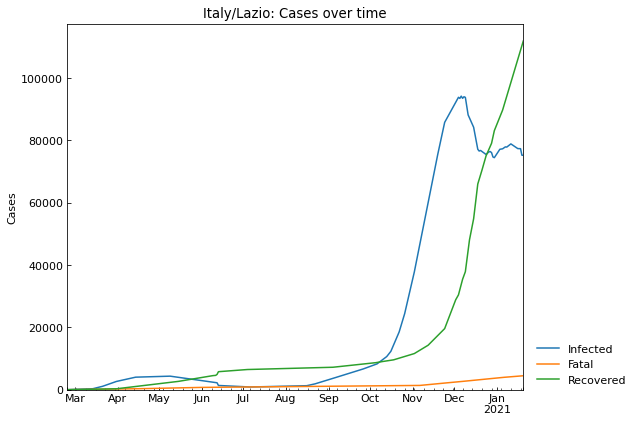

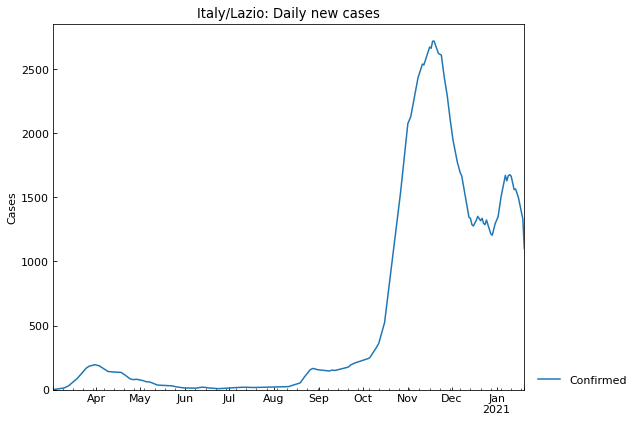

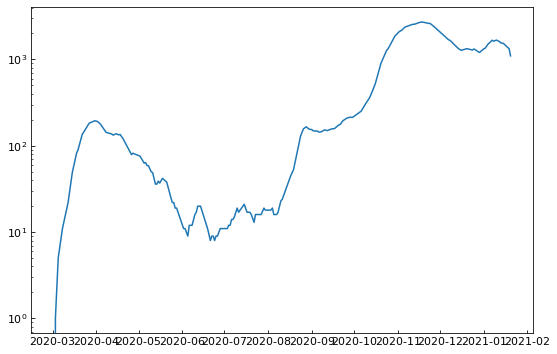

In [140]:

temp_df = scenarios_list[6].records()
temp_df['Susceptible'] = population_data.value("Italy", province= 'Lazio') - np.array(temp_df.Infected) - np.array(temp_df.Fatal) - np.array(temp_df.Recovered)

prova = scenarios_list[6].records_diff(variables=["Confirmed"], window = 7 )

plt.plot(temp_df.loc[7::,'Date'], prova)
plt.yscale('log')
plt.show()


In [113]:
jhu_data.records(country = "Italy")

(          Date  Confirmed  Infected  Fatal  Recovered
 0   2020-02-24        229       221      7          1
 1   2020-02-25        322       311     10          1
 2   2020-02-26        400       385     12          3
 3   2020-02-27        649       587     17         45
 4   2020-02-28        887       820     21         46
 ..         ...        ...       ...    ...        ...
 327 2021-01-16    2368733    557717  81800    1729216
 328 2021-01-17    2381277    553374  82177    1745726
 329 2021-01-18    2390102    547059  82554    1760489
 330 2021-01-19    2400598    535524  83157    1781917
 331 2021-01-20    2400598    535524  83157    1781917
 
 [332 rows x 5 columns],
 'monotonic increasing complemented confirmed data and \nmonotonic increasing complemented fatal data')